In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_excel('Train Data.xlsx', index_col=False, sheet_name=None)
data_train = data['Train'].copy()
data_train.interpolate(inplace=True)
x=data_train.drop('Adj Close',axis=1)
y=data_train['Adj Close']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [83]:
reg=DecisionTreeRegressor()
reg.fit(x_train,y_train)
preds=reg.predict(x_test)
full_pred=reg.predict(x)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

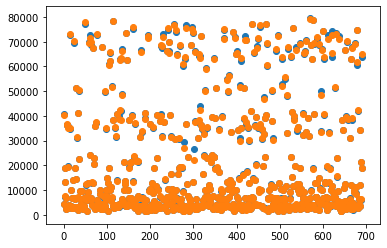

In [93]:
plt.scatter(np.arange(0,692,1),preds)
plt.scatter(np.arange(0,692,1),y_test)

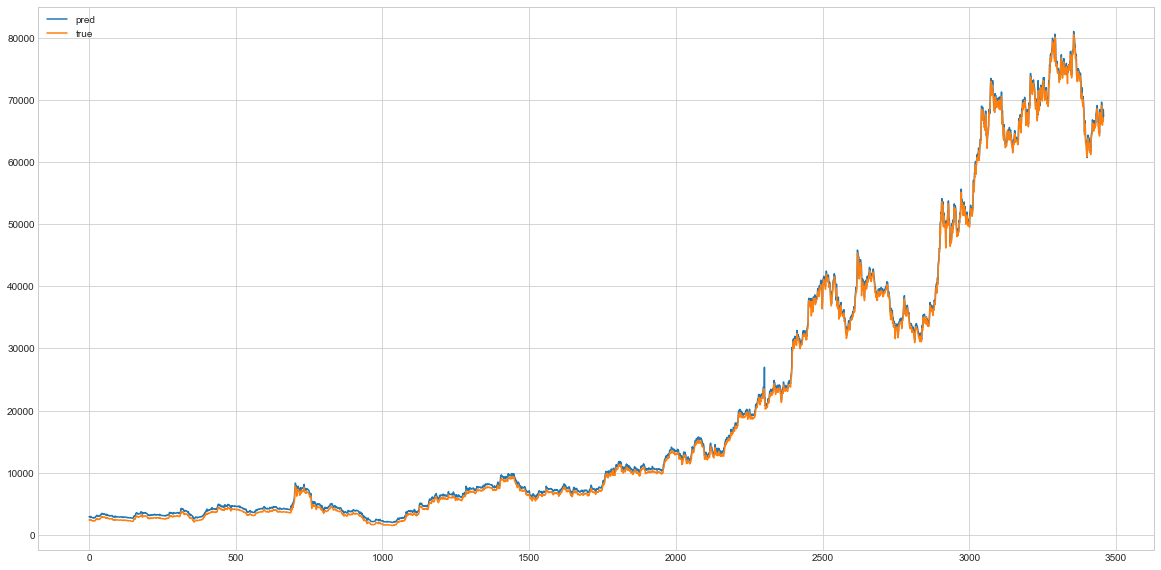

In [113]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10))
plt.plot(np.arange(0,3459,1),full_pred,label='pred')
plt.plot(np.arange(0,3459,1),y,label='true')
plt.legend(['pred','true'],loc=2)

In [ ]:
def mean_absolute_percentage_error(y_true, y_preds):
    y_true, y_preds = np.array(y_true), np.array(y_preds)
    return np.mean(np.abs((y_true - y_preds) / y_true)) * 100
mean_absolute_percentage_error(y_test,preds)

In [115]:
def make_preds():
    import numpy as np
    import pandas as pd
    import pickle    
    with open('18BCE051_18BCE052_18BCE058_18BCE063.pkl', 'rb') as file:
        pickled_model = pickle.load(file)
    filename = input('Enter test filename (with extension): ')
    test_data = pd.read_csv(filename)
    preds = pickled_model.predict(test_data)
    pd.DataFrame(preds).to_csv('output.csv', header=False, index=False)
    print('\nPredictions saved in output.csv')

In [116]:
def dump_model():
    import pickle
    file  = "18BCE051_18BCE052_18BCE058_18BCE063.pkl"
    fileobj = open(file,'wb')
    pickle.dump(reg,fileobj)
    fileobj.close()

In [117]:
dump_model()
make_preds()

Enter test filename (with extension): Book1.csv

Predictions saved in output.csv
